In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_excel(r'G:\Python\Machine Learning\Practice\My Dataset\Pakistan Medicines Dataset.xlsx')
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')
df

,Drug Name,Manufacturer,Strength,Form,Indication,Side Effects,Available In,Age Restriction,Prescription Required,Price
0,Panadol,GSK,500mg,Tablet,"Fever, mild pain",Liver damage (high dose),All cities,NaN,No,35.0
1,Arinac Forte,Abott,400mg + 60mg,Tablet,"Cold, flu, fever, nasal congestion","Nausea, dizziness, dry mouth etc",All cities,12+,Yes,NaN
2,Arinac,Abbott,200mg + 30mg,NaN,"Cold, flu, nasal congestion","Drowsiness, high BP",All cities,12+,Yes,65.0
3,OMC-D,Sami Pharma,20mg,Tablet,"Acidity, gastric issues","Headache, diarrhea",All cities,12+,Yes,100.0
4,Paracetamol,Various,500mg,Tablet,"Fever, pain",Liver issues (overdose),All cities,NaN,No,30.0
...,...,...,...,...,...,...,...,...,...,...
92,Voveran Emulgel,Novartis,1.16% Diclofenac Diethylamine,Gel,Joint/muscle inflammation,Skin irritation,All cities,12+,No,120.0
93,Terbinafine Gel,Sami Pharma,1% Terbinafine,Gel,Skin fungal infection,"Rash, dryness",All cities,12+,Yes,110.0
94,Aczone Gel,Ali Gohar Pharma,5% Dapsone,Gel,Acne vulgaris,"Itching, burning",All cities,12+,Yes,190.0
95,Aloe Vera Gel,Pure Leaf,N/A,Gel,"Skin moisturizing, sunburn",No major side effects,All cities,All ages,No,60.0


In [5]:
df.isnull().sum().sort_values(ascending=False)

Form                     21
Price                    21
Age Restriction           3
Indication                2
Side Effects              1
Drug Name                 0
Manufacturer              0
Strength                  0
Available In              0
Prescription Required     0
dtype: int64

In [6]:
col=['Form','Age Restriction','Indication','Side Effects']
from sklearn.impute import SimpleImputer

# Using SimpleImputer for categorical columns
simple_imp = SimpleImputer(strategy='most_frequent')
df[col] = simple_imp.fit_transform(df[col])

# Using SimpleImputer for categorical columns in cat_cols
knn_imp = KNNImputer(n_neighbors=10)
df[['Price']] = knn_imp.fit_transform(df[['Price']])
df

,Drug Name,Manufacturer,Strength,Form,Indication,Side Effects,Available In,Age Restriction,Prescription Required,Price
0,Panadol,GSK,500mg,Tablet,"Fever, mild pain",Liver damage (high dose),All cities,12+,No,35.000000
1,Arinac Forte,Abott,400mg + 60mg,Tablet,"Cold, flu, fever, nasal congestion","Nausea, dizziness, dry mouth etc",All cities,12+,Yes,102.736842
2,Arinac,Abbott,200mg + 30mg,Tablet,"Cold, flu, nasal congestion","Drowsiness, high BP",All cities,12+,Yes,65.000000
3,OMC-D,Sami Pharma,20mg,Tablet,"Acidity, gastric issues","Headache, diarrhea",All cities,12+,Yes,100.000000
4,Paracetamol,Various,500mg,Tablet,"Fever, pain",Liver issues (overdose),All cities,12+,No,30.000000
...,...,...,...,...,...,...,...,...,...,...
92,Voveran Emulgel,Novartis,1.16% Diclofenac Diethylamine,Gel,Joint/muscle inflammation,Skin irritation,All cities,12+,No,120.000000
93,Terbinafine Gel,Sami Pharma,1% Terbinafine,Gel,Skin fungal infection,"Rash, dryness",All cities,12+,Yes,110.000000
94,Aczone Gel,Ali Gohar Pharma,5% Dapsone,Gel,Acne vulgaris,"Itching, burning",All cities,12+,Yes,190.000000
95,Aloe Vera Gel,Pure Leaf,N/A,Gel,"Skin moisturizing, sunburn",No major side effects,All cities,All ages,No,60.000000


In [7]:
categoric_cols=['Drug Name','Manufacturer','Strength','Form','Indication','Side Effects','Available In','Age Restriction','Prescription Required']

le=LabelEncoder()
for col in categoric_cols:
    df[col]=le.fit_transform(df[[col]])
df

,Drug Name,Manufacturer,Strength,Form,Indication,Side Effects,Available In,Age Restriction,Prescription Required,Price
0,62,13,43,10,44,37,0,2,0,35.000000
1,5,4,35,10,31,0,0,2,1,102.736842
2,4,3,28,10,32,19,0,2,1,65.000000
3,60,39,29,10,2,26,0,2,1,100.000000
4,65,46,43,10,45,38,0,2,0,30.000000
...,...,...,...,...,...,...,...,...,...,...
92,83,30,16,2,56,58,0,2,0,120.000000
93,80,39,14,2,74,53,0,2,1,110.000000
94,1,5,38,2,4,33,0,2,1,190.000000
95,2,35,52,2,75,48,0,8,0,60.000000


In [8]:
scalar=StandardScaler()
for col_2 in categoric_cols:
    df[[col_2]] = scalar.fit_transform(df[[col_2]])
df

,Drug Name,Manufacturer,Strength,Form,Indication,Side Effects,Available In,Age Restriction,Prescription Required,Price
0,0.673070,-0.640129,0.844336,0.745662,0.083716,0.210569,0.0,-0.874458,-1.052946,35.000000
1,-1.563351,-1.311802,0.332857,0.745662,-0.454885,-1.637184,0.0,-0.874458,0.949716,102.736842
2,-1.602587,-1.386433,-0.114687,0.745662,-0.413454,-0.688338,0.0,-0.874458,0.949716,65.000000
3,0.594599,1.300262,-0.050752,0.745662,-1.656378,-0.338763,0.0,-0.874458,0.949716,100.000000
4,0.790777,1.822674,0.844336,0.745662,0.125147,0.260508,0.0,-0.874458,-1.052946,30.000000
...,...,...,...,...,...,...,...,...,...,...
92,1.497015,0.628588,-0.881906,-1.366139,0.580886,1.259293,0.0,-0.874458,-1.052946,120.000000
93,1.379309,1.300262,-1.009776,-1.366139,1.326640,1.009597,0.0,-0.874458,0.949716,110.000000
94,-1.720293,-1.237172,0.524662,-1.366139,-1.573516,0.010812,0.0,-0.874458,0.949716,190.000000
95,-1.681058,1.001740,1.419751,-1.366139,1.368071,0.759900,0.0,1.481721,-1.052946,60.000000


In [12]:
from pycaret.regression import *
exp = setup(data=df, target='Price', session_id=123,n_jobs=3)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(97, 10)"
4,Transformed data shape,"(97, 10)"
5,Transformed train set shape,"(67, 10)"
6,Transformed test set shape,"(30, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,45.8525,8304.7043,70.6560,-0.0376,0.5882,0.5694,0.0090
huber,Huber Regressor,47.0311,8346.3973,70.9329,-0.0453,0.5839,0.5688,0.0100
ada,AdaBoost Regressor,42.4853,4957.5756,60.6082,-0.1358,0.5699,0.6410,0.0320
omp,Orthogonal Matching Pursuit,55.4830,7839.9805,75.0172,-0.4144,0.6690,0.8362,0.0080
br,Bayesian Ridge,55.1254,8084.3929,75.9876,-0.4330,0.6776,0.8319,0.0090
en,Elastic Net,55.9614,8043.4853,76.3731,-0.4780,0.6680,0.8065,0.0090
catboost,CatBoost Regressor,42.1031,5719.3951,60.9158,-0.5395,0.4560,0.4905,0.3240
dummy,Dummy Regressor,53.2919,8662.0983,78.9500,-0.5503,0.7312,0.9411,0.0070
knn,K Neighbors Regressor,53.2216,7575.1460,77.6783,-0.8518,0.6468,0.7328,0.0140
llar,Lasso Least Angle Regression,60.2132,8471.0204,81.1671,-0.8601,0.6861,0.7573,0.0090


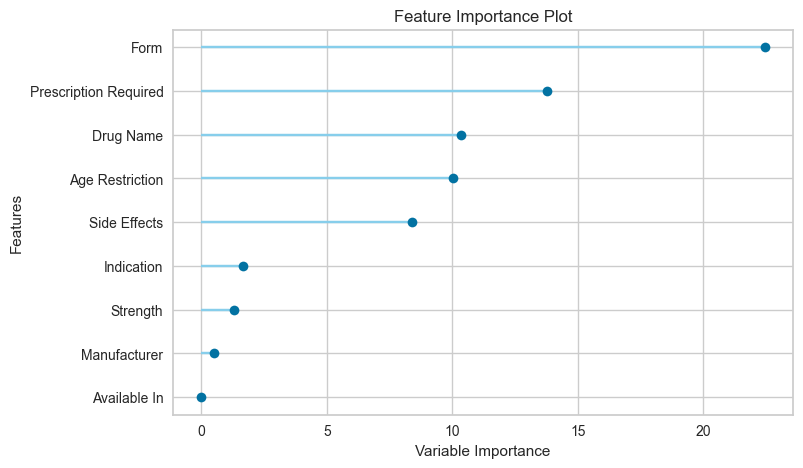

In [16]:
plot_model(best_model, plot='feature')

